In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('april_test_radt.csv')
# df=df[(13 < df['time_new']) & (df['time_new'] < 24)]
# df.reset_index(inplace=True)

In [138]:
df1=pd.read_csv('final_format_comparison_ol_InGrWr.csv')
# df1=df1[(13 < df1['time_new']) & (df1['time_new'] < 24)]
# df2=df1[df1['months']=='april']
# df2
df['wrf_tixan_radt_1']=df1.loc[:,'wrf_tixan'].reset_index(drop=True)

In [139]:
df

,date,time,time_new,ineichen_alao,ground_alao,wrf_alao_radt_30,wrf_alao_radt_10,wrf_alao_radt_1,ineichen_cumbe,ground_cumbe,...,ineichen_tixan,ground_tixan,wrf_tixan_radt_30,wrf_tixan_radt_10,ineichen_tunshi,ground_tunshi,wrf_tunshi_radt_30,wrf_tunshi_radt_10,wrf_tunshi_radt_1,wrf_tixan_radt_1
0,4/1/2018,0:00,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4/1/2018,1:00,2,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4/1/2018,2:00,3,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4/1/2018,3:00,4,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4/1/2018,4:00,5,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,4/30/2018,19:00,20,989,157,755,727.0,717.8,924.0,574.0,...,981.0,350.0,51.0,81.4,930.0,264.0,745.0,651.7,500.2,464.5
716,4/30/2018,20:00,21,752,294,519,310.2,521.6,700.0,477.8,...,747.0,116.0,114.0,97.7,704.0,284.0,269.0,342.3,405.2,410.0
717,4/30/2018,21:00,22,458,383,165,211.9,211.5,422.0,141.2,...,456.0,210.0,263.0,61.5,424.0,275.0,113.0,203.2,238.1,219.0
718,4/30/2018,22:00,23,144,43,7,19.1,21.2,129.0,71.2,...,145.0,180.0,9.0,3.5,129.0,27.0,6.0,22.3,19.9,58.5


In [132]:
########Tunshi###############
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tunshi'], g['wrf_tunshi_radt_30'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tunshi'], g['wrf_tunshi_radt_30'] ) )
    return pd.Series( dict(  tunshi_MAE_30 = MAE, tunshi_RMSE_30 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
df_new['days']=np.arange(1,31,1)
tunshi_radt_30=df_new
tunshi_radt_30.head()

,date,tunshi_MAE_30,tunshi_RMSE_30,days
0,2018-04-01,122.750000,222.644522,1
1,2018-04-02,147.875000,263.593674,2
2,2018-04-03,177.333333,299.801045,3
3,2018-04-04,164.916667,285.116789,4
4,2018-04-05,121.791667,226.462377,5


In [133]:
########Tixan###############
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tixan'], g['wrf_tixan_radt_30'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tixan'], g['wrf_tixan_radt_30'] ) )
    return pd.Series( dict(  tixan_MAE_30 = MAE, tixan_RMSE_30 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
#df_new['days']=np.arange(1,31,1)
df_new.drop(['date'], axis=1,inplace=True)
tixan_radt_30=df_new
tixan_radt_30.head()

,tixan_MAE_30,tixan_RMSE_30
0,34.958333,74.195968
1,61.750000,114.963038
2,138.250000,248.702131
3,95.125000,150.651778
4,54.958333,103.361622


In [134]:
########Tunshi###############
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tunshi'], g['wrf_tunshi_radt_10'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tunshi'], g['wrf_tunshi_radt_10'] ) )
    return pd.Series( dict(  tunshi_MAE_10 = MAE, tunshi_RMSE_10 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
#df_new['days']=np.arange(1,31,1)
df_new.drop(['date'], axis=1,inplace=True)
tunshi_radt_10=df_new
tunshi_radt_10.head()

,tunshi_MAE_10,tunshi_RMSE_10
0,117.675000,198.309398
1,140.833333,254.192017
2,182.366667,300.405427
3,208.058333,329.803650
4,117.845833,197.321872


In [135]:
########Tixan###############
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tixan'], g['wrf_tixan_radt_10'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tixan'], g['wrf_tixan_radt_10'] ) )
    return pd.Series( dict(  tixan_MAE_10 = MAE, tixan_RMSE_10 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
#df_new['days']=np.arange(1,31,1)
df_new.drop(['date'], axis=1,inplace=True)
tixan_radt_10=df_new
tixan_radt_10.head()

,tixan_MAE_10,tixan_RMSE_10
0,59.670833,117.882956
1,66.387500,129.111804
2,135.812500,239.340104
3,137.666667,224.496941
4,60.700000,106.939512


In [136]:
########Tunshi###############
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tunshi'], g['wrf_tunshi_radt_1'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tunshi'], g['wrf_tunshi_radt_1'] ) )
    return pd.Series( dict(  tunshi_MAE_1 = MAE, tunshi_RMSE_1 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
#df_new['days']=np.arange(1,31,1)
df_new.drop(['date'], axis=1,inplace=True)
tunshi_radt_1=df_new
tunshi_radt_1.head()

,tunshi_MAE_1,tunshi_RMSE_1
0,92.187500,182.609836
1,143.700000,256.885177
2,180.495833,298.338366
3,212.566667,334.889018
4,121.433333,221.936802


In [140]:
########Tixan###############
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tixan'], g['wrf_tixan_radt_1'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tixan'], g['wrf_tixan_radt_1'] ) )
    return pd.Series( dict(  tixan_MAE_1 = MAE, tixan_RMSE_1 = RMSE ) )

stat=df.groupby( 'date' ).apply( r2_rmse ).reset_index()
stat['date'] = pd.to_datetime(stat['date'],infer_datetime_format=True)
df_new = stat.sort_values(by=['date']).reset_index(drop=True)
#df_new['days']=np.arange(1,31,1)
df_new.drop(['date'], axis=1,inplace=True)
tixan_radt_1=df_new
tixan_radt_1

,tixan_MAE_1,tixan_RMSE_1
0,50.833333,100.135637
1,45.125000,78.195535
2,96.000000,167.589839
3,110.958333,186.500950
4,40.791667,70.943640
5,93.458333,185.494384
6,66.708333,119.676648
7,92.250000,185.213559
8,87.666667,139.724357
9,68.291667,156.162576


In [141]:
df_rad=pd.concat([tunshi_radt_30,tunshi_radt_10,tunshi_radt_1,tixan_radt_30,tixan_radt_10,tixan_radt_1],axis=1)
df_rad

,date,tunshi_MAE_30,tunshi_RMSE_30,days,tunshi_MAE_10,tunshi_RMSE_10,tunshi_MAE_1,tunshi_RMSE_1,tixan_MAE_30,tixan_RMSE_30,tixan_MAE_10,tixan_RMSE_10,tixan_MAE_1,tixan_RMSE_1
0,2018-04-01,122.750000,222.644522,1,117.675000,198.309398,92.187500,182.609836,34.958333,74.195968,59.670833,117.882956,50.833333,100.135637
1,2018-04-02,147.875000,263.593674,2,140.833333,254.192017,143.700000,256.885177,61.750000,114.963038,66.387500,129.111804,45.125000,78.195535
2,2018-04-03,177.333333,299.801045,3,182.366667,300.405427,180.495833,298.338366,138.250000,248.702131,135.812500,239.340104,96.000000,167.589839
3,2018-04-04,164.916667,285.116789,4,208.058333,329.803650,212.566667,334.889018,95.125000,150.651778,137.666667,224.496941,110.958333,186.500950
4,2018-04-05,121.791667,226.462377,5,117.845833,197.321872,121.433333,221.936802,54.958333,103.361622,60.700000,106.939512,40.791667,70.943640
5,2018-04-06,63.333333,118.893860,6,93.375000,170.670684,83.504167,146.299953,132.000000,251.189835,137.295833,247.994013,93.458333,185.494384
6,2018-04-07,77.416667,157.997627,7,134.962500,265.426544,80.175000,137.732153,129.875000,225.197968,121.800000,226.379074,66.708333,119.676648
7,2018-04-08,146.625000,244.606231,8,132.975000,231.883922,129.358333,218.444142,131.875000,259.251567,106.737500,202.205773,92.250000,185.213559
8,2018-04-09,140.333333,234.427850,9,132.604167,220.372203,149.254167,239.833900,119.375000,187.590756,92.391667,145.216712,87.666667,139.724357
9,2018-04-10,111.916667,237.168014,10,107.716667,228.544859,103.387500,230.425817,60.000000,127.482679,69.004167,126.576118,68.291667,156.162576


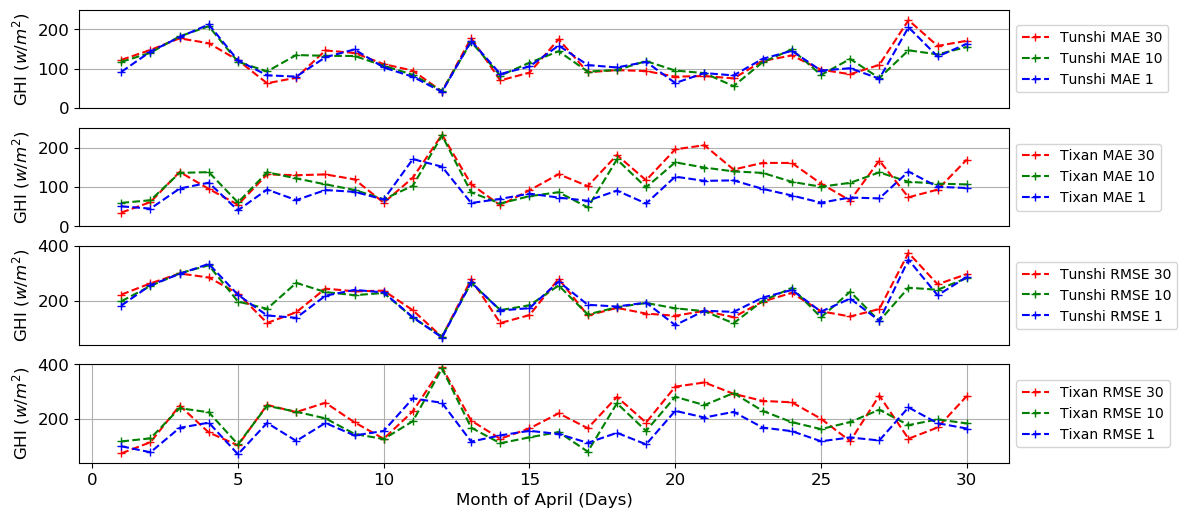

In [146]:
plt.figure(figsize=(12,6),dpi=100)
plt.subplot(411)
plt.plot(df_rad.days,df_rad.tunshi_MAE_30,'r+--',label='Tunshi MAE 30')
plt.plot(df_rad.days,df_rad.tunshi_MAE_10,'g+--',label='Tunshi MAE 10')
plt.plot(df_rad.days,df_rad.tunshi_MAE_1,'b+--',label='Tunshi MAE 1')
#plt.xlabel('Month of April (Days)',fontsize=15)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,250)
plt.grid()

plt.subplot(412)
plt.plot(df_rad.days,df_rad.tixan_MAE_30,'r+--',label='Tixan MAE 30')
plt.plot(df_rad.days,df_rad.tixan_MAE_10,'g+--',label='Tixan MAE 10')
plt.plot(df_rad.days,df_rad.tixan_MAE_1,'b+--',label='Tixan MAE 1')
#plt.xlabel('Month of April (Days)',fontsize=15)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.ylim(0,250)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

plt.subplot(413)
plt.plot(df_rad.days,df_rad.tunshi_RMSE_30,'r+--',label='Tunshi RMSE 30')
plt.plot(df_rad.days,df_rad.tunshi_RMSE_10,'g+--',label='Tunshi RMSE 10')
plt.plot(df_rad.days,df_rad.tunshi_RMSE_1,'b+--',label='Tunshi RMSE 1')
#plt.xlabel('Month of April (Days)',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.ylim(40,400)
plt.grid()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.1)

plt.subplot(414)
plt.plot(df_rad.days,df_rad.tixan_RMSE_30,'r+--',label='Tixan RMSE 30')
plt.plot(df_rad.days,df_rad.tixan_RMSE_10,'g+--',label='Tixan RMSE 10')
plt.plot(df_rad.days,df_rad.tixan_RMSE_1,'b+--',label='Tixan RMSE 1')
plt.xlabel('Month of April (Days)',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)
plt.ylim(40,400)
plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.2)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

